In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prettytable import PrettyTable

# 1. Reading data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

# 2. Data Analysis

## 2.1 Statistical Analysis

In [3]:
print('train_data shape -->', project_data.shape)
print(project_data.columns.values)

train_data shape --> (109248, 17)
['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0


In [5]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

In [6]:
project_data.describe()

,Unnamed: 0,teacher_number_of_previously_posted_projects,project_is_approved
count,109248.000000,109248.000000,109248.000000
mean,91183.786568,11.153165,0.848583
std,52548.095272,27.777154,0.358456
min,0.000000,0.000000,0.000000
25%,45743.500000,0.000000,1.000000
50%,91253.500000,2.000000,1.000000
75%,136712.500000,9.000000,1.000000
max,182079.000000,451.000000,1.000000


In [7]:
project_data.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [8]:
print('resources shape -->', resource_data.shape)
print(resource_data.columns.values)

resources shape --> (1541272, 4)
['id' 'description' 'quantity' 'price']


In [9]:
resource_data.head(3)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


In [10]:
resource_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541272 entries, 0 to 1541271
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1541272 non-null  object 
 1   description  1540980 non-null  object 
 2   quantity     1541272 non-null  int64  
 3   price        1541272 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ MB


In [11]:
resource_data.describe()

,quantity,price
count,1.541272e+06,1.541272e+06
mean,2.860509e+00,5.028398e+01
std,7.570345e+00,1.447326e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.900000e+00
50%,1.000000e+00,1.499000e+01
75%,2.000000e+00,3.980000e+01
max,8.000000e+02,9.999000e+03


In [12]:
resource_data.isnull().sum()

id               0
description    292
quantity         0
price            0
dtype: int64

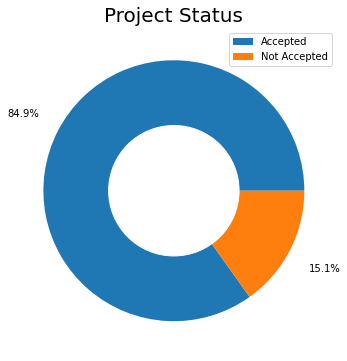

In [13]:
def donut_plot(data, labels, title):
    plt.figure(figsize=(6,6))
    plt.pie(data, autopct='%1.1f%%', pctdistance=1.3)
    circle = plt.Circle((0,0), 0.5, color='white')
    p=plt.gcf()
    p.gca().add_artist(circle)
    plt.title(title, fontsize=20)
    plt.legend(labels)
    plt.show()
    
labels = ['Accepted', 'Not Accepted']
title = 'Project Status'
y_value_counts = project_data['project_is_approved'].value_counts()
data = [y_value_counts[1], y_value_counts[0]]

donut_plot(data, labels, title)

## 2.2 Univariate Analysis

In [14]:
def univariate_analysis(col, data=project_data, target_col='project_is_approved', top=False):
    temp = pd.DataFrame()
    temp['approved'] = data.groupby(col)[target_col].apply(lambda x: x.sum())
    temp['total'] = data.groupby(col)[target_col].agg('count')
    temp = temp.reset_index().set_index(np.arange(len(data[col].unique())))
    temp = temp.sort_values(by='total', ascending=False).reset_index(drop=True)
    if top:
        temp = temp[0:top]

    plt.figure(figsize=(20,5))
    index = np.arange(temp.shape[0])
    p1 = plt.bar(index, temp['total'].values)
    p2 = plt.bar(index, temp['approved'].values)
    plt.title('Projects approved v/s total projects')
    plt.ylabel('Number of projects')
    plt.xticks(index, temp[col])
    plt.show()
    
    print('Top 5:\n')
    print(temp.head(5))
    print('-'*50)
    print('Bottom 5:\n')
    print(temp.tail(5))

### 2.2.1 teacher_prefix

In [15]:
def preprocess_teacher_prefix(df):
    df['teacher_prefix'] = df['teacher_prefix'].fillna('Mrs.')
    df['teacher_prefix'] = df['teacher_prefix'].str.replace('.', '')
    df['clean_teacher_prefix'] = df['teacher_prefix'].str.lower()
preprocess_teacher_prefix(project_data)

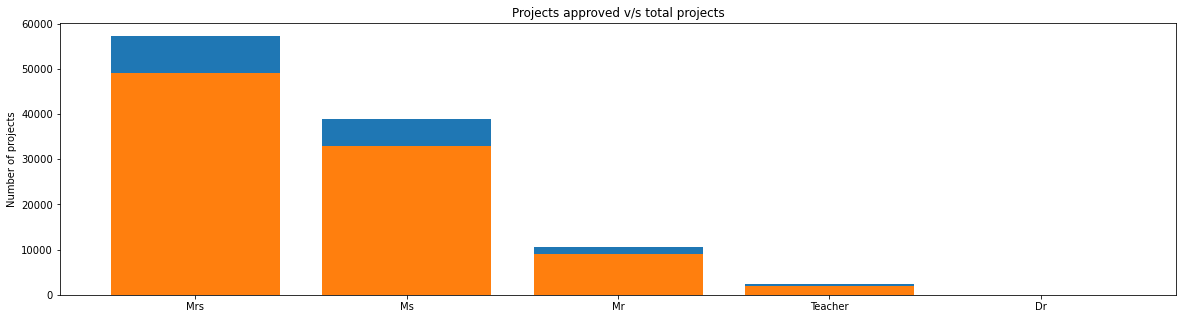

Top 5:

  teacher_prefix  approved  total
0            Mrs     49000  57272
1             Ms     32860  38955
2             Mr      8960  10648
3        Teacher      1877   2360
4             Dr         9     13
--------------------------------------------------
Bottom 5:

  teacher_prefix  approved  total
0            Mrs     49000  57272
1             Ms     32860  38955
2             Mr      8960  10648
3        Teacher      1877   2360
4             Dr         9     13


In [16]:
univariate_analysis('teacher_prefix')

### 2.2.2 school_state

In [17]:
def preprocess_school_state(df):
    df['school_state'] = df['school_state'].str.lower()
preprocess_school_state(project_data)

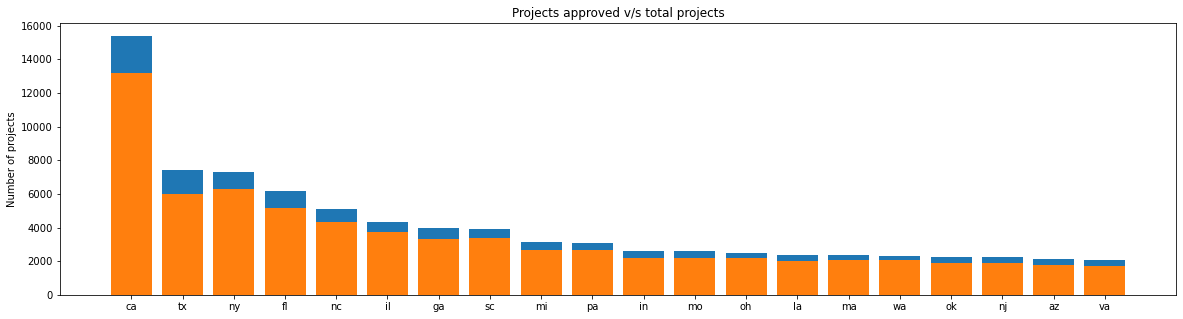

Top 5:

  school_state  approved  total
0           ca     13205  15388
1           tx      6014   7396
2           ny      6291   7318
3           fl      5144   6185
4           nc      4353   5091
--------------------------------------------------
Bottom 5:

   school_state  approved  total
15           wa      2045   2334
16           ok      1900   2276
17           nj      1888   2237
18           az      1800   2147
19           va      1739   2045


In [18]:
univariate_analysis('school_state', top=20)

### 2.2.3 project_grade_category

In [19]:
def preprocess_project_grade_category(df):
    df['project_grade_category'] = df['project_grade_category'].str.replace(' ', '_')
    df['project_grade_category'] = df['project_grade_category'].str.replace('-', '_')
    df['project_grade_category'] = df['project_grade_category'].str.lower()
preprocess_project_grade_category(project_data)

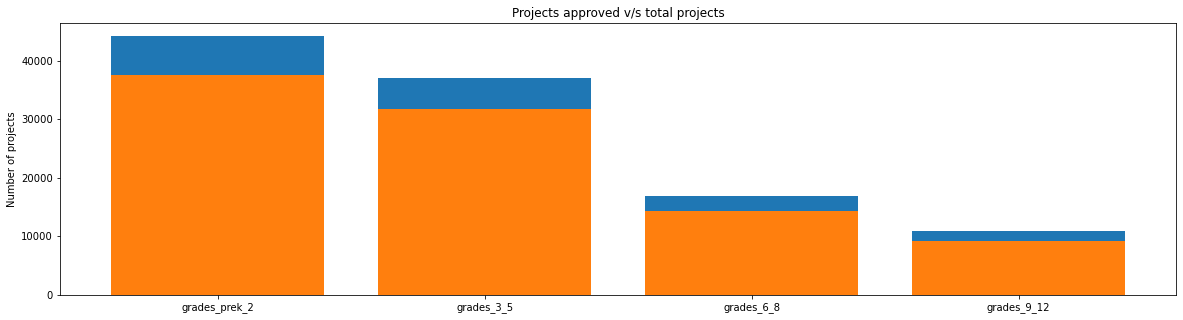

Top 5:

  project_grade_category  approved  total
0          grades_prek_2     37536  44225
1             grades_3_5     31729  37137
2             grades_6_8     14258  16923
3            grades_9_12      9183  10963
--------------------------------------------------
Bottom 5:

  project_grade_category  approved  total
0          grades_prek_2     37536  44225
1             grades_3_5     31729  37137
2             grades_6_8     14258  16923
3            grades_9_12      9183  10963


In [20]:
univariate_analysis('project_grade_category')

### 2.2.4 project_subject_categories

In [21]:
def preprocess_project_subject_categories(df):
    df['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The', '')
    df['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ', '')
    df['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&', '_')
    df['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',', '_')
    df['project_subject_categories'] = project_data['project_subject_categories'].str.lower()

preprocess_project_subject_categories(project_data)

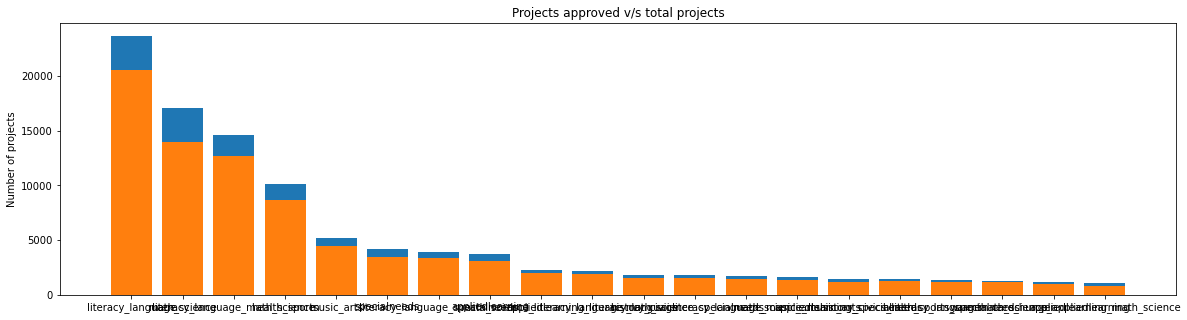

Top 5:

       project_subject_categories  approved  total
0               literacy_language     20520  23655
1                    math_science     13991  17072
2  literacy_language_math_science     12725  14636
3                   health_sports      8640  10177
4                      music_arts      4429   5180
--------------------------------------------------
Bottom 5:

          project_subject_categories  approved  total
15  history_civics_literacy_language      1271   1421
16        health_sports_specialneeds      1215   1391
17                warmth_care_hunger      1212   1309
18      math_science_appliedlearning      1019   1220
19      appliedlearning_math_science       855   1052


In [22]:
univariate_analysis('project_subject_categories', top=20)

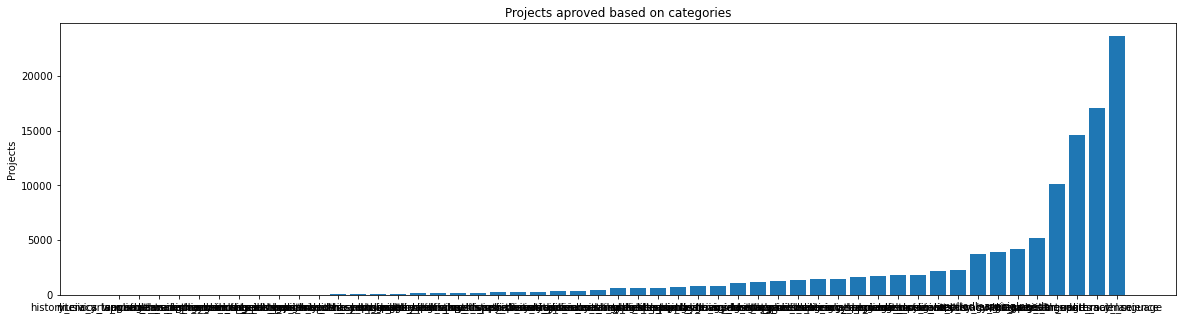

In [23]:
from collections import Counter
my_counter = Counter()
for word in project_data['project_subject_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

index = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(index, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('Projects aproved based on categories')
plt.xticks(index, list(sorted_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_cat_dict.items():
    print("{:40} :{:30}".format(i,j))

history_civics_warmth_care_hunger        :                             1
music_arts_warmth_care_hunger            :                             2
literacy_language_warmth_care_hunger     :                             9
music_arts_appliedlearning               :                            10
appliedlearning_warmth_care_hunger       :                            10
math_science_warmth_care_hunger          :                            11
history_civics_health_sports             :                            13
music_arts_history_civics                :                            18
music_arts_health_sports                 :                            19
health_sports_warmth_care_hunger         :                            23
specialneeds_warmth_care_hunger          :                            23
specialneeds_health_sports               :                            42
history_civics_appliedlearning           :                            42
health_sports_history_civics             :         

### 2.2.5 project_subject_subcategories

In [25]:
def preprocess_project_subject_subcategories(df):
    df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(' The', '')
    df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(' ','')
    df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace('&', '_')
    df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(',', '_')
    df['project_subject_subcategories'] = df['project_subject_subcategories'].str.lower()

preprocess_project_subject_subcategories(project_data)

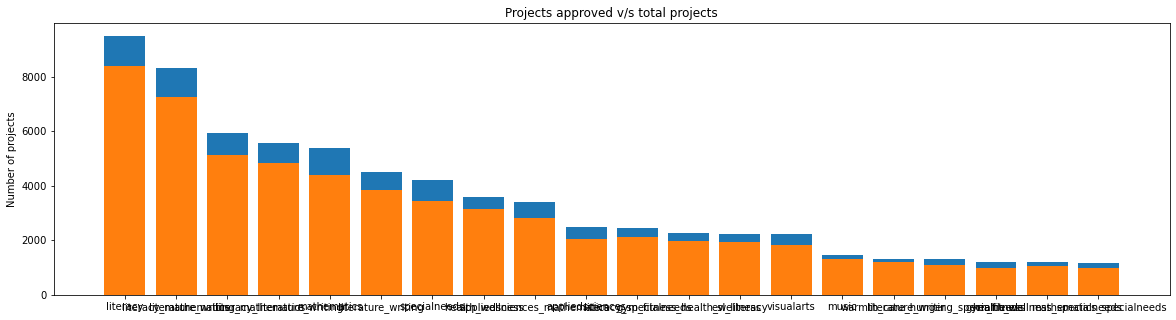

Top 5:

    project_subject_subcategories  approved  total
0                        literacy      8371   9486
1            literacy_mathematics      7260   8325
2  literature_writing_mathematics      5140   5923
3     literacy_literature_writing      4823   5571
4                     mathematics      4385   5379
--------------------------------------------------
Bottom 5:

      project_subject_subcategories  approved  total
15               warmth_care_hunger      1212   1309
16  literature_writing_specialneeds      1093   1306
17                      gym_fitness      1002   1195
18     health_wellness_specialneeds      1044   1189
19         mathematics_specialneeds       972   1187


In [26]:
univariate_analysis('project_subject_subcategories', top=20)

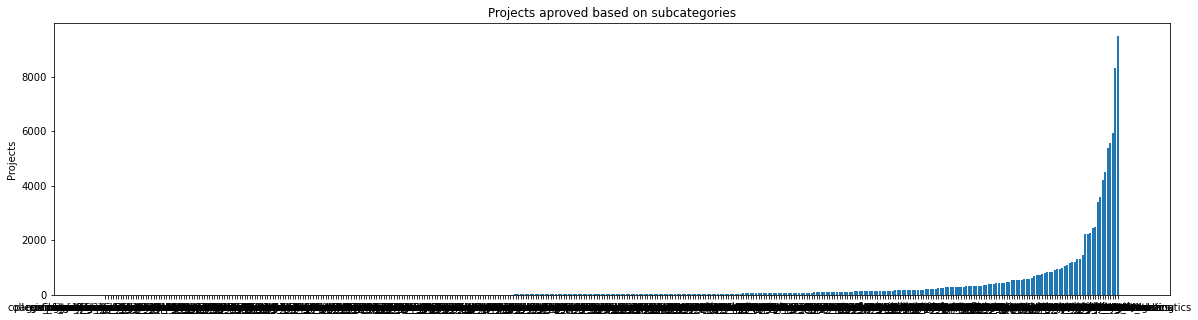

In [27]:
from collections import Counter
my_counter = Counter()
for word in project_data['project_subject_subcategories'].values:
    my_counter.update(word.split())

sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

index = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(index, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('Projects aproved based on subcategories')
plt.xticks(index, list(sorted_sub_cat_dict.keys()))
plt.show()

In [28]:
for i, j in sorted_sub_cat_dict.items():
    print("{:40} :{:30}".format(i,j))

gym_fitness_parentinvolvement            :                             1
communityservice_gym_fitness             :                             1
college_careerprep_warmth_care_hunger    :                             1
economics_other                          :                             1
parentinvolvement_warmth_care_hunger     :                             1
communityservice_music                   :                             1
gym_fitness_socialsciences               :                             1
parentinvolvement_teamsports             :                             1
civics_government_nutritioneducation     :                             1
financialliteracy_foreignlanguages       :                             1
economics_nutritioneducation             :                             1
economics_music                          :                             1
other_warmth_care_hunger                 :                             1
communityservice_financialliteracy       :         

### 2.2.6 title

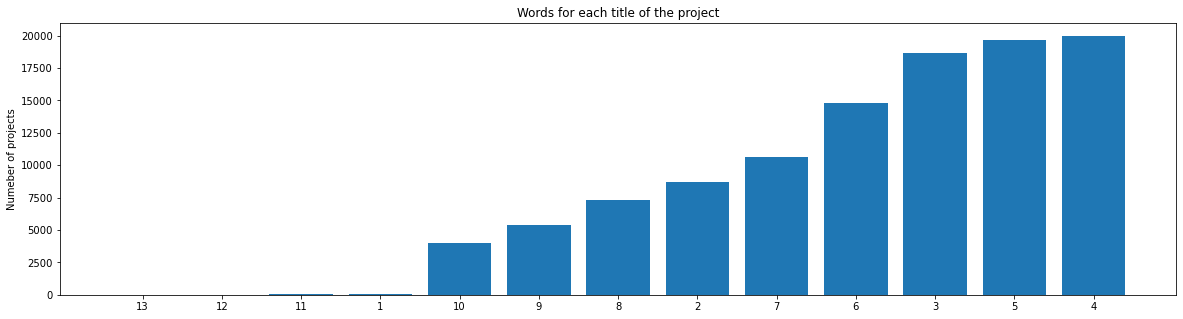

In [29]:
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))

index = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(index, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(index, list(word_dict.keys()))
plt.show()

In [30]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

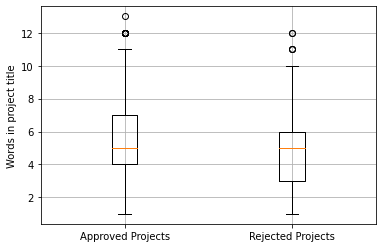

In [31]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

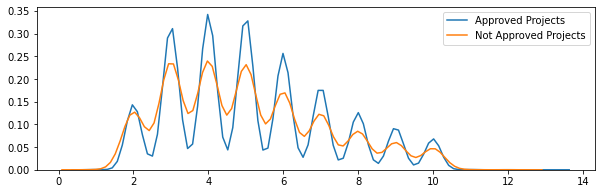

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 2.2.7 essay

In [33]:
project_data["essay"] = project_data["project_essay_1"].map(str) + \
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

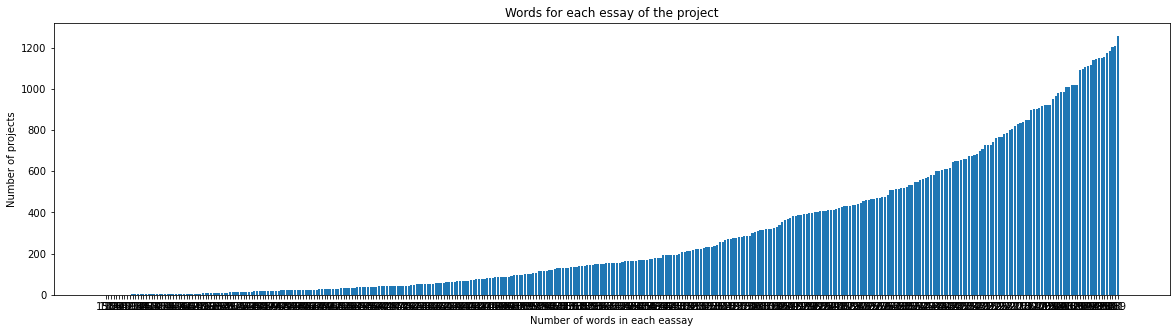

In [34]:
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))

index = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(index, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(index, list(word_dict.keys()))
plt.show()

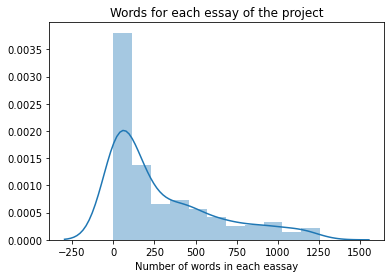

In [35]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()

In [36]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

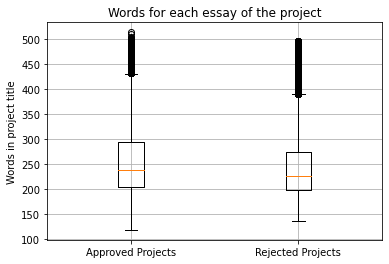

In [37]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

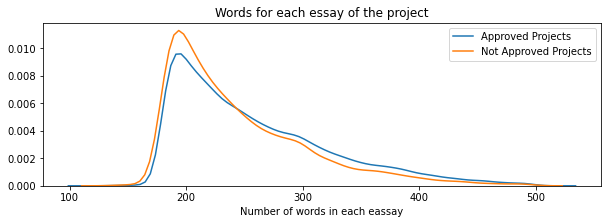

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 2.2.8 price

In [39]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'})
price_data.head(3)

,price,quantity
id,,
p000001,459.56,7
p000002,515.89,21
p000003,298.97,4


In [40]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [41]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values
rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

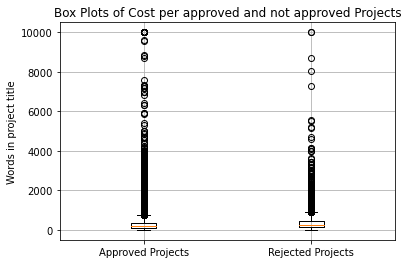

In [42]:
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

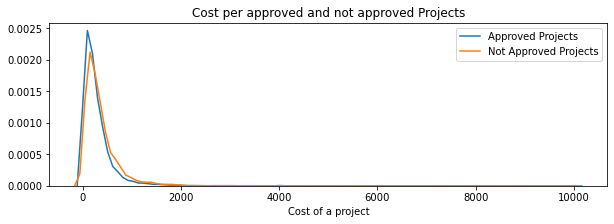

In [43]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [44]:
x = PrettyTable()
x.field_names = ['Percentile', 'Approved', 'Rejected']

for i in range(0,105,5):
    x.add_row([i, np.round(np.percentile(approved_price,i),3), np.round(np.percentile(rejected_price,i),3)])
print(x)

+------------+----------+----------+
| Percentile | Approved | Rejected |
+------------+----------+----------+
|     0      |   0.66   |   1.97   |
|     5      |  13.59   |   41.9   |
|     10     |  33.88   |  73.67   |
|     15     |   58.0   |  99.109  |
|     20     |  77.38   |  118.56  |
|     25     |  99.95   | 140.892  |
|     30     |  116.68  |  162.23  |
|     35     | 137.232  | 184.014  |
|     40     |  157.0   | 208.632  |
|     45     | 178.265  | 235.106  |
|     50     |  198.99  | 263.145  |
|     55     |  223.99  |  292.61  |
|     60     |  255.63  | 325.144  |
|     65     | 285.412  |  362.39  |
|     70     | 321.225  |  399.99  |
|     75     | 366.075  | 449.945  |
|     80     |  411.67  | 519.282  |
|     85     |  479.0   | 618.276  |
|     90     |  593.11  | 739.356  |
|     95     | 801.598  | 992.486  |
|    100     |  9999.0  |  9999.0  |
+------------+----------+----------+
